In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

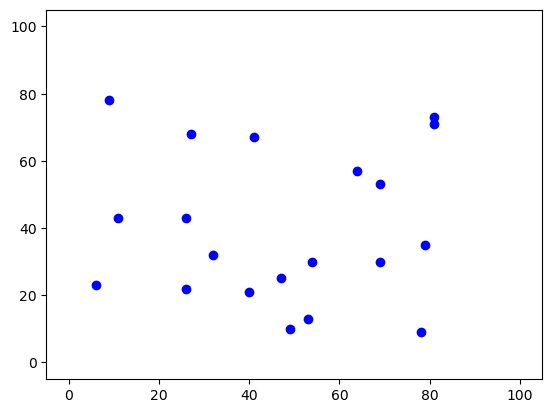

In [2]:
# node / [x coordinate, y coordinate]
node = np.random.randint(101, size=(20,2))

for i in node:
    plt.scatter(i[0], i[1], c="b")
plt.axis([-5, 105, -5, 105])
plt.show()

In [3]:
# build distance matrix
distance_matrix = np.zeros((len(node),len(node)))

for i in range(len(node)):
    for j in range(len(node)):
        distance_matrix[i][j] = np.linalg.norm(np.array((node[i][0],node[i][1]))-np.array((node[j][0],node[j][1])))

In [11]:
class GeneticAlgorithm:
    def __init__(self):
        self.population = []
        self.parent = []
        self.best = None
        self.best_log = []
        self.best_score_log = []
    
    def initialize(self, n_population, n_nodes):
        self.population = [np.random.permutation(n_nodes) for _ in range(n_population)]

    def get_objective_value(self, solution): # calculate fitness
        objective = 0
        distance_list = [distance_matrix[solution[idx]][solution[idx+1]] for idx in range(len(solution)-1)]
        objective = sum(distance_list) + distance_matrix[solution[-1]][solution[0]]

        return objective

    def elitism(self, n_parent):
        self.parent = []
        fitness_population = {}
        for solution in self.population:
            fitness = self.get_objective_value(solution)
            fitness_population[fitness] = solution
        sorted_dict = sorted(fitness_population.items())

        self.best = sorted_dict[0][1]
        best_fitness = self.get_objective_value(self.best)
        self.best_log.append(self.best)
        self.best_score_log.append(best_fitness)
        
        for sol_tuple in sorted_dict[:n_parent]:
            self.parent.append(sol_tuple[1])

    def tournament_selection(self, n_tournament):
        participants = random.sample(self.population, n_tournament)
        fitness_population = {}
        for solution in participants:
            fitness = self.get_objective_value(solution)
            fitness_population[fitness] = solution
        sorted_dict = sorted(fitness_population.items())
        winner = sorted_dict[0][1]

        return winner
    
    """
    Singe Point CO
        def crossover(self, solution1, solution2):
        sol1 = np.copy(solution1)
        sol2 = np.copy(solution2)
        
        idx = np.random.randint(len(sol1))

        for node in sol1[:idx]:
            sol2 = sol2[sol2 != node]
        
        solution = np.concatenate((sol1[:idx],sol2))

        return solution
    
    """
    
    #Cycle Crossover
    def crossover(self, solution1, solution2):
        sol1 = np.copy(solution1)
        sol2 = np.copy(solution2)
        size = len(sol1)

        # Initialize the offspring as -1, which represents uninitialized nodes
        offspring = np.full(size, -1)
        idx = 0

        # Randomly choose a starting point for the cycle
        cycle_start = np.random.randint(size)

        # Keep track of the indices where cycle is
        while offspring[cycle_start] == -1:
            # Add the corresponding elements from the parent solutions to the offspring
            offspring[cycle_start] = sol1[cycle_start]
            cycle_start = np.where(sol1 == sol2[cycle_start])[0][0]

        # Fill in the remaining uninitialized nodes with the values from the other parent
        for i in range(size):
            if offspring[i] == -1:
                offspring[i] = sol2[i]

        return offspring

    def mutation(self, solution):
        mutated_solution = np.copy(solution)
        idx1 = np.random.randint(len(mutated_solution))
        idx2 = np.random.randint(len(mutated_solution))

        while idx1 == idx2:
            idx2 = np.random.randint(len(mutated_solution))
        
        mutated_solution[[idx1, idx2]] = mutated_solution[[idx2, idx1]]

        return mutated_solution
    
    def genetic_algorithm(self, n_population, n_parent, n_nodes, n_tournament, p_crossover, p_mutation, max_generation):
        self.initialize(n_population, n_nodes)
        for _ in tqdm(range(max_generation)):
            self.elitism(n_parent)
            population = []

            while len(population) != n_population - len(self.parent):
                parent1 = self.tournament_selection(n_tournament)
                parent2 = self.tournament_selection(n_tournament)

                if p_crossover >= np.random.rand(1)[0]:
                    offspring = self.crossover(parent1, parent2)
                else:
                    random_parent = [parent1, parent2]
                    offspring = random_parent[np.random.randint(len(random_parent))]
                
                if p_mutation >= np.random.rand(1)[0]:
                    offspring = self.mutation(offspring)

                population.append(offspring)
            
            population += self.parent
            self.population = population

        self.elitism(n_parent)

In [12]:
ga = GeneticAlgorithm()
ga.genetic_algorithm(100, 10, 20, 2, 0.9, 0.1, 50)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 126.90it/s]


In [13]:
def draw_route(solution):
    for i in node:
        plt.scatter(i[0], i[1], c="b")
    for idx in range(len(solution)-1):
        plt.plot([node[solution[idx]][0],node[solution[idx+1]][0]], [node[solution[idx]][1],node[solution[idx+1]][1]], c="green")
    plt.plot([node[solution[-1]][0],node[solution[0]][0]], [node[solution[-1]][1],node[solution[0]][1]], c="green")
    plt.axis([-5, 105, -5, 105])
    plt.show()

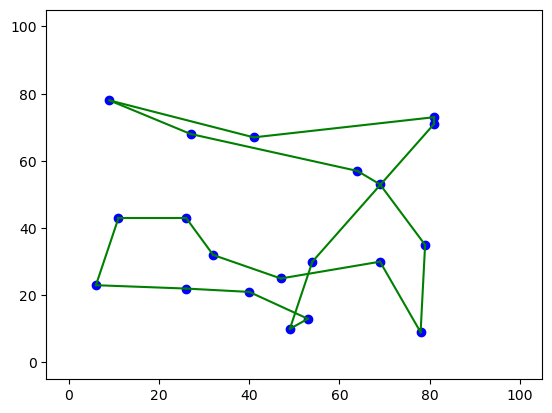

In [14]:
best_solution = ga.best
draw_route(best_solution)